In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

In [77]:
df = pd.read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\Medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [79]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

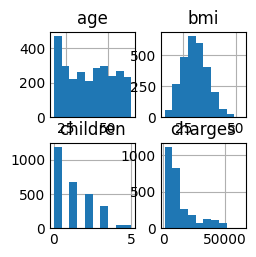

In [80]:
df.hist()

In [81]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast
2768,21,female,34.600,0,no,southwest
2769,19,male,26.030,1,yes,northwest
2770,23,male,18.715,0,no,northwest


In [82]:
region = X['region'].str.lower()
region.unique() # Areas where the insurance operates

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Step 1: Data Cleanup 
- Convert integer values ​​to numeric values ​​
- Scale very wide values ​​
- Replace missing values ​​
- Check data for skewness

In [83]:
X['sex'] = X['sex'].map({'male':0,'female':1})

encoder = OneHotEncoder(drop='first', sparse_output=False)  

smoker_encoded = encoder.fit_transform(X[['smoker']])

smoker_df = pd.DataFrame(smoker_encoded, columns=encoder.get_feature_names_out(['smoker']))

X = pd.concat([X.drop('smoker', axis=1), smoker_df], axis=1)

region_encoded = encoder.fit_transform(X[['region']])

region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['region']))

X = pd.concat([X.drop('region', axis=1), region_df], axis=1)

X

,age,sex,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1.0,0.0,0.0,1.0
1,18,0,33.770,1,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0.0,0.0,1.0,0.0
2768,21,1,34.600,0,0.0,0.0,0.0,1.0
2769,19,0,26.030,1,1.0,1.0,0.0,0.0
2770,23,0,18.715,0,0.0,1.0,0.0,0.0


In [84]:
X_filled = X.dropna()
X_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2772 non-null   int64  
 1   sex               2772 non-null   int64  
 2   bmi               2772 non-null   float64
 3   children          2772 non-null   int64  
 4   smoker_yes        2772 non-null   float64
 5   region_northwest  2772 non-null   float64
 6   region_southeast  2772 non-null   float64
 7   region_southwest  2772 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 173.4 KB


Step 2: Scatterplots of relationships between variables & charges

Diagram illustration :age


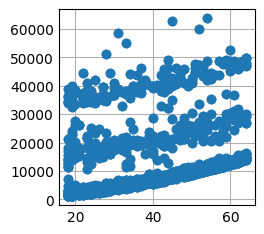

Diagram illustration :sex


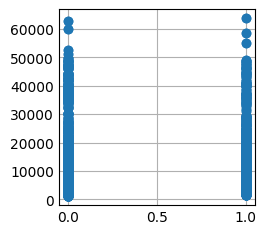

Diagram illustration :bmi


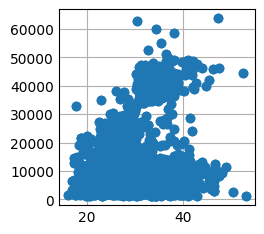

Diagram illustration :children


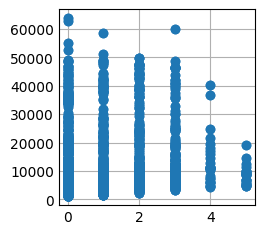

Diagram illustration :smoker_yes


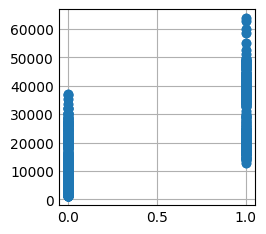

Diagram illustration :region_northwest


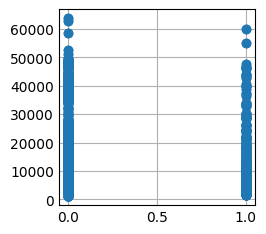

Diagram illustration :region_southeast


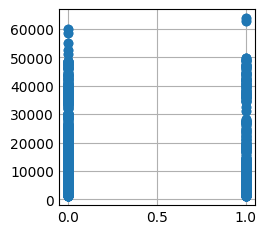

Diagram illustration :region_southwest


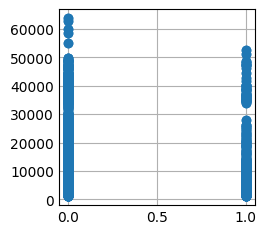

In [85]:
for k ,_ in X.items():
    print(f'Diagram illustration :{k}')
    plt.scatter(X[k],y)
    plt.show()

Step 3: Creating a basic regression model

In [86]:
X = X.values
y = y.values



class ModelBas:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def splitting_values(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=87)
        return X_train, X_test, y_train, y_test

    def model(self, X_train, X_test, y_train):
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return y_pred

    def accuracy_of_the_model(self, y_pred, y_test):
        r2 = r2_score(y_test, y_pred)
        return f'Mean Squared Error: {r2:.3f}'
    
obj = ModelBas(X, y)
X_train, X_test, y_train, y_test = obj.splitting_values()
y_pred = obj.model(X_train, X_test, y_train)
accuracy = obj.accuracy_of_the_model(y_pred, y_test)
print(accuracy)

Mean Squared Error: 0.754


Step 4: Removal of out features and out values

In [ ]:
def Remove_outliers1(X_train,X_test,y_train):
    
    lof = LocalOutlierFactor(n_neighbors=30,n_jobs=-1,contamination=0.5)
    X_sel = lof.fit_predict(X_train)

    mask = X_sel != -1

    X_train ,y_train = X_train[mask,:] ,y_train[mask]

    model = LinearRegression()

    model.fit(X_train,y_train)
    yhat = model.predict(X_test)

    r2 = r2_score(y_test,yhat)
    return f'Mean Squared Error: {r2:.3f}'

def run():
    run = Remove_outliers1(X_train,X_test,y_train)
    print(run)
run()

Mean Squared Error: 0.753
